<a href="https://colab.research.google.com/github/KimHee-Sun/class2022Spring/blob/main/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tokenization

In [ ]:
import nltk
#natural language: 사람의 언어, artificial language 의 반대 (컴퓨터 language) -> text라고 생각하면 됨
#package는 nltk, text processing을 다룰 것

In [ ]:
# copy a file from github
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/crime_punishment.txt"
os.system("curl " + url + " > crime_punishment.txt")
#방법 1: txt 파일을 url로 걸어서 실행하면 sample data가 생김
# read a text file in the server
file = open("crime_punishment.txt")
#open해서 file을 불러오고
text = file.read().replace("\n", " ")
#모든 text를 string으로 가져오는 것 (중요)
file.close()

In [ ]:
# or copy/pase text here
#방법 2
text = 'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. \
The ones who see things differently — they’re not fond of rules. \
You can quote them, disagree with them, glorify or vilify them, \
but the only thing you can’t do is ignore them because they change things. \
They push the human race forward, and while some may see them as the crazy ones, we see genius, \
because the ones who are crazy enough to think that they can change the world, are the ones who do.'

**Tokenization**
- 긴 stirngs, 여러 문장으로 된 것을 하나하나 끊어서 들고 있는 것을 Token = 단어수준으로 끊는 것
  - list 안에 단어들을 넣는 것이라고 생각하면 됨


In [ ]:
# write out a text file
file = open("tmp.txt", "w")
#file을 output으로 write out할 수 있음 
file.write(text)
file.close()

In [ ]:
text.split()
#띄어쓰기를 기준으로 쪼개짐 -> list로 string을 쪼개 item으로 나누는 것 = 전형적인 Tokenization
#one's도 하나로 

In [ ]:
' '.join(text.split())
#다시 ' ' 띄어쓰기 단위로 join할 수도 있음 (' ' -> space를 string으로 만든 것)

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
#punctuation에 대한 정의가 들어 있음
words = word_tokenize(text)
#위에 punctuation 들이 붙어 있는데, 이것조차 쪼개서 사용

In [ ]:
words

In [ ]:
from nltk.tokenize import RegexpTokenizer
#Punctuation도 없애는 것, regular expression
retokenize = RegexpTokenizer("[\w]+")
words = retokenize.tokenize(text)
#regular expression 기반으로 자르는 것 (list로)

In [ ]:
words

### Normalization  
- cleaning, 깨끗하게 하는 것 -> 동사의 어미, 명사에 붙은 접두사 등을 분리하는 것등을 의미

**Stemming** 어간 추출 대충의 패턴 규칙으로 어미를 잘라내는 것 (사전에 없는 어간 나올 수 있음)

- 어간 추출: 대충 패턴 규칙으로 이 부분이 어미일 것이다~ 라고 잘라내는 것 (접두사, 접미사) -> 나름의 기계적인 규칙이라서 사전에 없는 것도 존재

**Lemmatization** 표제어(기본 사전형) 추출

- 표제어를 기반으로 변형시켜 원형으로 복귀



In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
[stemmer.stem(w) for w in words]
#list comprehension
#stemmer!

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
[stemmer.stem(w) for w in words]

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(w) for w in words]

### Stopword
- 너무 많이 쓰는 관사, 대명사, 조동사 등은 관심이 없는 영역 -> contents가 없는 것들은 분석에 없으므로 따로 묶어놓기도 함
- 한국어로 뭐라고 한다고,,?

In [ ]:
from nltk.corpus import stopwords  
nltk.download('stopwords')
#contents가 없는 것들의 단어 list를 받아오는 것
print(words)
words = [w for w in words if not w in stopwords.words('english')]
#list comprehension: words의 단어를 for loop로 받아서 검사를 하는 것 -> stop words에 들어있지 않으면 그것을 취하라 (stop words에 있는 것을 빼라)
print(words)

### Collocation, Concordance
- collocation: 연어, 'take care'
- concordance: 특정 단어에 대해서 그 용례가 어떻게 되는 지 보여줄 수 있음 -> 조동사 would가 어디에 쓰였는 지 찾아줌

In [ ]:
nltk.download('gutenberg')
#저작권이 없는 것 text를 무료로 모아서 제공하는 것을 gutenberg
text = nltk.corpus.gutenberg.raw('austen-emma.txt')
words = retokenize.tokenize(text)
#단어별로 다 잘라서 list로 담는 것이 retokenize

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [ ]:
len(words)

161983

In [ ]:
nltk.Text(words).collocations()  # default: (num=20, window_size=2)
#20개의 collocation -> 연속해서 나오는 것
#window size = 3을 해주면 단어가 세개가 연어로 된 것을 찾으라는 것임

Mrs Weston; Frank Churchill; Miss Woodhouse; Mrs Elton; Miss Bates;
Jane Fairfax; Miss Fairfax; every thing; young man; every body; great
deal; Mrs Goddard; dare say; Maple Grove; John Knightley; Miss Taylor;
Miss Smith; Robert Martin; Colonel Campbell; Box Hill


In [ ]:
nltk.Text(words).concordance('Emma', 79, 10)
#emma라는 단어가 등장하는 앞 뒤로의 contexts를 같이 10개 뽑아라
#79: text의 숫자가 79개

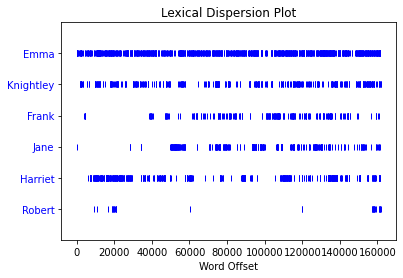

In [ ]:
nltk.Text(words).dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])
#dispersion plot:16만개의 순서에서emma라는 것이 등장하는 곳이 언제인 지

In [ ]:
# Distributional similarity: 
# find other words which appear in the same contexts as the specified word; 
# list most similar words first.
nltk.Text(words).similar("Emma")
#분포상으로 유사한 게 무엇인가? emma와 양쪽 옆으로 나올 단어를 찾아봐라!

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [ ]:
# Find contexts where the specified words appear; list most frequent common contexts first.
nltk.Text(words).common_contexts(["Emma", "she"])
#common contexts: specified 된 words 2개가 나타나는 contexts (공통으로 나타나는 양쪽 단어)를 말해라

### Frequency distribution, Frequency plot
- text processing에서 가장 중요한 것이 Frequency: 어떤 것이 많이 쓰였는 지를 통해 document에 대한 정의를 내릴 수 있음 (특징을 잘 반영해주므로)

In [ ]:
fd = nltk.FreqDist(words).most_common(20)
fd

In [ ]:
nltk.Text(words).plot(20)

### Dictionary
- 사전, 통으로 불러와서 유용하게 사용

In [ ]:
nltk.download('words')
nltk.corpus.words.words('en')[-20:-1]
#[-20:-1]은 제일 마지막 20개!

In [ ]:
len(nltk.corpus.words.words('en'))

### Extract information (pos tag, named entity)
- pos tag는 품사, 정의가 설명되어 있음 (약어, 설명, 예) -> 자동으로 문장 내에서 품사를 분석해주는 것도 중요한 과정 = part of speech

#### **POS tag list**:

CC	coordinating conjunction \
CD	cardinal digit \
DT	determiner \
EX	existential there (like: "there is" ... think of it like "there exists") \
FW	foreign word \
IN	preposition/subordinating conjunction \
JJ	adjective	'big' \
JJR	adjective, comparative	'bigger' \
JJS	adjective, superlative	'biggest' \
LS	list marker	1) \
MD	modal	could, will \
NN	noun, singular 'desk' \
NNS	noun plural	'desks' \
NNP	proper noun, singular	'Harrison' \
NNPS	proper noun, plural	'Americans' \
PDT	predeterminer	'all the kids' \
POS	possessive ending	parent's \
PRP	personal pronoun	I, he, she \
PRP\$	possessive pronoun	my, his, hers \
RB	adverb	very, silently, \
RBR	adverb, comparative	better \
RBS	adverb, superlative	best \
RP	particle	give up \
TO	to	go 'to' the store. \
UH	interjection	errrrrrrrm \
VB	verb, base form	take \
VBD	verb, past tense	took \
VBG	verb, gerund/present participle	taking \
VBN	verb, past participle	taken \
VBP	verb, sing. present, non-3d	take \
VBZ	verb, 3rd person sing. present	takes \
WDT	wh-determiner	which \
WP	wh-pronoun	who, what \
WP\$	possessive wh-pronoun	whose \
WRB	wh-abverb	where, when \

In [ ]:
sent = "I am Jhon from America and would like to go to Starbuck"
words = nltk.word_tokenize(sent)

In [ ]:
words

In [ ]:
nltk.download('averaged_perceptron_tagger')
pos = nltk.pos_tag(words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
pos

In [ ]:
nltk.download('maxent_ne_chunker')
NE = nltk.ne_chunk(pos)
# common Entity types: ORGANIZATION, PERSON, LOCATION, DATE, TIME, MONEY, and GPE (geo-political entity)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


In [ ]:
NE

### Wordcloud
- Frequency 기반 visualization -> text에 어떤 단어가 많이 나왔는 지! 단어 빈도별로 글자의 크기(font size)를 달리하여 visualize해줌

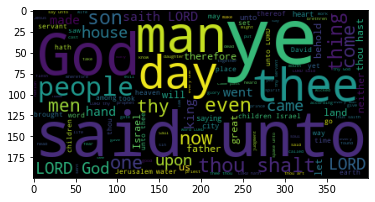

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = nltk.corpus.gutenberg.raw('bible-kjv.txt')
#string으로 다 담겨있음
wc = WordCloud().generate(text) 
plt.imshow(wc)

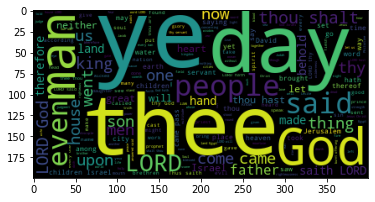

In [ ]:
stopwords = set(STOPWORDS) 
stopwords.add('unto')
#unto를 빼고 싶다!
wc = WordCloud(stopwords = stopwords).generate(text)
#기존 stopwords에 unto를 더했음 -> 다른 stopwords 포함해서 unto까지 빠져있다는 걸 알 수 있음 
plt.imshow(wc)

### Regular expression
- 규칙을 표현하는 것: 어떠한 규칙을 표현해서 text에 조작을 가하고 싶을 때 규칙으로 해서 찾아냄 

ex. words 파일에서 search를 할 수 있음
- 여러 규칙들을 쓰는 것을 regular expression

In [ ]:
import re

In [ ]:
re.search('a', 'abcdefa')
#search: 주어진 string에 대해서 무언가를 찾는 것
#오른쪽 항(string에 대해서) 왼쪽 항을 찾아라

- 앞부분만 찾아줌: 제일 처음 발견되는 a에 대해서만
- span(0,1): 앞에 바로 있다 ex. 'ab'였다면 span=(0,2)

In [ ]:
re.findall('a', 'abcdefa')
#findall: 전부 찾아주는 것 -> string에서 찾아서 list로 만들어줌

In [ ]:
re.sub('a', 'b', 'abcdefa')
#sub: replace, a를 b에 바꾸어라 (search처럼 처음에만 해당되는 게 아니라 전체에 해당)

- **'a' 'b'처럼 직접적인 입력값을 줄 수도 있지만, 아예 규칙을 넣을 수도 있음**

In [ ]:
'''       Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

.	        Wildcard, matches any character
^abc	    Matches some pattern abc at the start of a string
abc$	    Matches some pattern abc at the end of a string
[abc]	    Matches one of a set of characters
[^abc]    Matches anything but a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+	        One or more of previous item, e.g. a+, [a-z]+
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	      Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	  Parentheses that indicate the scope of the operators
(...)     Matches whatever regular expression is inside the parentheses
\d
Matches any decimal digit; this is equivalent to the class [0-9].
\D
Matches any non-digit character; this is equivalent to the class [^0-9].
\s
Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].
\S
Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].
\w
Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].
\W
Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].

'''

In [ ]:
engdict = nltk.corpus.words.words('en')
#list로 들어와 있는 것 <-> search와 findall은 'stirng'에 적용됨
#engdict (0) = 'A'임 (stirng) -> 이 string에 대해서 search와 findall을 사용할 것임
#regular expression이 string을 대상으로 한다는 걸 기억하기!

In [ ]:
result = [w for w in engdict if re.search('ed$', w)]
#engdict라는 list가 있는데, list comprehension을 이용해서 각각의 item을 w로 받아서 그 개수만큼 for loof를 도는 것
#각 loof에 대해서 if가 적용 -> regular expresson search를 하는 것 -> 들어온 item, w에 대해서 ed$ (위에서는 'a'라고 썼는데 여기선 아예 regular expression)
#읽는 방법: if에서 이 search가 w라는 string에 ed$가 있으면 w에 담기는 것
#ed$:string의 끝(마지막점)에 'ed'가 있는 것을 찾아라/^abc: string의 앞에 (시작점)

print(result[:10])

In [ ]:
re.search('ed$','educated')

In [ ]:
result = [w for w in engdict if re.search('^..j..t..$', w)]
#string의 시작과 끝, .의 의미는 어떤 캐릭터가 와도 상관없다는 것이므로 (spelling spelling j spelling spelling t인 것을 찾아라)

print(result[:10])

In [ ]:
result = [w for w in engdict if re.search('^[ghi][mno][jlk][def]$', w)]
#대괄호:첫번째 캐릭터가 ghi 중에 하나, 그 다음은 mno 중에 하나~ -> 총 4개의 캐릭터! (기억하기)
print(result[:10])

In [ ]:
result = [w for w in engdict if re.search('^[ah]+$', w)][:10]
#+: a혹은 h가 한번 이상 나오는 것을 찾아라
print(result[:10])

In [ ]:
nltk.download('treebank')
wsj = nltk.corpus.treebank.words()

result = [w for w in wsj if re.search('(ed|ing)$', w)]
#(ed|ing): ed혹은 ing로 끝나는 단어를 찾아라

result = sorted(set(result))
#없으면 신문에 있는 순서대로 그냥 나오는 것, sort해주면 a to z 순서로
print(result[:10])

In [ ]:
result = [w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]
#[0-9]는 숫자를 의미, \=역슬래쉬, \.을 쓰는 이유는 .이 any character가 아니라 그냥 .임을 의미하고 싶어서 앞에 \를 붙여준 것
#처음에 숫자가 하나 이상 나오고, 점이 나오고, 그 이후 숫자가 하나 이상 나오는 것을 찾아라 = 소수점이 들어간 수를 찾아라!

result = sorted(set(result))
print(result[:10])

In [ ]:
result = [w for w in wsj if re.search('^[A-Z]+\$$', w)]
#\$는 실제 $를 search하고 싶어서! = 어떠한 대문자 알파벳이 하나 이상 나오고 달러표시로 끝나면 찾아라

result = sorted(set(result))
print(result[:10])

In [ ]:
result = [w for w in wsj if re.search('^[0-9]{4}$', w)]
#숫자가 4번 나오고 끝나는 것을 찾아라 (^로 시작해서 $로 끝나니까) = 네자리수

result = sorted(set(result))
print(result[:10])

In [ ]:
result = [w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]
#숫자가 하나 이상 나오고, 대쉬가 나오고, 소문자가 3개에서 5개 사이인 것으로 끝나면 찾아라
result = sorted(set(result))
print(result[:10])

In [ ]:
result = [w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]
#소문자가 5개 이상나오고, 대쉬가 나온 뒤, 소문자가 2개에서 3개 사이로 나오고 대쉬가 나온 뒤, 소문자가 6개 이하로 나오고 끝나는 것
result = sorted(set(result))
print(result[:10])

In [ ]:
import os
url = "https://raw.githubusercontent.com/hsnam95/my/main/friends_season01_script.txt"
os.system("curl " + url + " > friends_season01_script.txt")

# read a text file in the server
file = open("friends_season01_script.txt")
text = file.read()
file.close()
text
#현재 string인 상태

'101. The One Where Monica Gets a New Roommate\n(The Pilot-The Uncut Version)\n\nWritten by: Marta Kauffman & David Crane\nTranscribed by: guineapig\nAdditional transcribing by: Eric Aasen\n(Note: The previously unseen parts of this episode are shown in blue text.)\n\n[Scene: Central Perk, Chandler, Joey, Phoebe, and Monica are there.]\nMonica: There\'s nothing to tell! He\'s just some guy I work with!\nJoey: C\'mon, you\'re going out with the guy! There\'s gotta be something wrong with him!\nChandler: All right Joey, be nice.Ê So does he have a hump? A hump and a hairpiece?\nPhoebe: Wait, does he eat chalk?\n(They all stare, bemused.)\nPhoebe: Just, \'cause, I don\'t want her to go through what I went through with Carl- oh!\nMonica: Okay, everybody relax. This is not even a date. It\'s just two people going out to dinner and- not having sex.\nChandler: Sounds like a date to me.\n[Time Lapse]\nChandler: Alright, so I\'m back in high school, I\'m standing in the middle of the cafeteria,

In [ ]:
pattern = '(?<=: ).+(?=[\.|\?|\!])'
#(?<=내가 찾고자하는 것 앞에 나오는 것)(?=찾고자하는 것 뒤에 나오는 것)
#(?<=내가 찾고자하는 것 앞에 나오는 것).(?=찾고자하는 것 뒤에 나오는 것) -> a로 시작하고 b로 끝나는 중간에 있는 하나의 캐릭터를 찾아라
#앞에 조건, 나의 조건, 뒤의 조건 순서!
#-> 왼쪽에 :이 있고 빈칸이 있고 캐릭터가 하나 이상 나오고, 마침표나 물음표, 느낌표로 끝나는 것을 찾아라
sent = re.findall(pattern, text)]
#findall은 규칙에 해당되는 것을 모두 찾아 list화해주는 것 (<->search)
sent
text = '\n'.join(sent)
#list로 만든 것을 결합하는 것, \n은 space, 줄바꿈 -> 긴 줄로 바뀌는 것

SyntaxError: ignored

In [ ]:
# write out a text file
file = open("tmp.txt", "w")
file.write(text)
file.close()